In [34]:
import pandas as pd
from PIL import Image
import io
import numpy as np
import pickle
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os
from torchvision.transforms import ToTensor, Resize

if torch.cuda.is_available():
  torch.set_default_device('cuda')
  device = 'cuda'
else:
  device = 'cpu'

In [2]:
cntry_str =  np.load('cntry_str.npy', allow_pickle=True)
test = ['AE','NO','AE','CO','AD', 'NO']
np.searchsorted(cntry_str, test)

array([ 1, 39,  1, 13,  0, 39], dtype=int64)

In [3]:
fromfile = False
if fromfile:
    df = pd.read_parquet('data', engine='fastparquet')
    shuffled_df = df[['image.bytes', 'country_iso_alpha2']].sample(frac=1)
    shuffled_df.to_parquet('shuffled_data.parquet')
df = pd.read_parquet('shuffled_data.parquet', engine='fastparquet')
rows = df.shape[0]

In [35]:
class ImageDataset(torch.utils.data.Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image = Image.open(io.BytesIO(row['image.bytes']))
        if self.transform:
            image = self.transform(image)
        return image, row['country_iso_alpha2']

In [42]:
ds = ImageDataset(df, transforms.Compose([Resize(128), ToTensor()]))

('NO', torch.Size([3, 128, 691]))

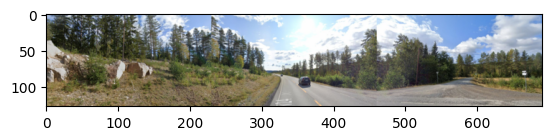

In [43]:
i = 202
im, lab = ds.__getitem__(i)
plt.imshow(im.transpose(0,2).transpose(0,1))
lab, im.shape

In [44]:
generator1 = torch.Generator('cuda').manual_seed(42)
torch.utils.data.random_split(ds, [0.3, 0.3, 0.4], generator=generator1)